In [1]:
import numpy as np # linear algebra
import pandas as pd # dataframes
import matplotlib # helping the plotting
import matplotlib.pyplot as plt # import pyplot creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.
import seaborn as sns # for making statistical graphics
from numpy.lib.utils import info

In [2]:
#load data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data1.csv')
df.head()

Saving data1.csv to data1.csv


,Timestamp,1. Currently Employment type in the company?,2. How does your organization deal with security issues?,3. How much of your company bussiness activity are related to security-related tasks?,4. How often do cybersecurity related problems occur in your organization?,5. What kind of internet platforms and applications does your organization utilize? (Multiple responses are possible).,6. The organization should provide trainings on cybersecurity.,7. The organization must inline and adopt security rules and regulations.,"8. The organization offers security publications, briefings, and gatherings.","9. Normally, share passwords with others.",...,14. Backups are required to preserve security.,15. Is it allowed to open the website which needs to be more authentic?,16. Password updated regularly?,17. Using the same password for various websites and social networks is a normal practice.,"18. Using personal devices (mobile, tablet, and laptop) is allowed during work.","19. Virus, malware, and Trojan horses may propagate from email attachments.","20. When a user clicks on an unsecured link on a website, viruses, malware, and Trojan horses may propagate.",21. I am aware of phishing and how to prevent it.,22. I am familiar with email fraud and how to prevent it.,23. I am familiar with ransomware and how to prevent it.
0,1/4/2023 9:52:43,Part time employee,Outsourced to the third party,Medium. 20-30%.,Never register incidents.,"Email for organisations and companies., Websit...",Agree,Agree,Agree,Disagree,...,Disagree,Agree,Disagree,Disagree,Agree,Agree,Agree,Disagree,Disagree,Disagree
1,1/10/2023 16:46:25,Full time employee,The company has dedicated security team,Medium. 20-30%.,1-5 times per month.,"Email for organisations and companies., Online...",Agree,Agree,Strongly agree,Disagree,...,Strongly agree,Agree,Strongly agree,Disagree,Neutral,Neutral,Agree,Agree,Agree,Strongly agree
2,1/10/2023 17:15:40,Full time employee,A part of IT job,Low. Less than 20%.,More than 10 times per month.,"Email for organisations and companies., Websit...",Strongly agree,Strongly agree,Disagree,Strongly disagree,...,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,1/10/2023 22:05:02,Other,I do not know,Top priority. More than 30%.,I do not know.,Others....,Neutral,Neutral,Neutral,Disagree,...,Agree,Neutral,Agree,Disagree,Disagree,Disagree,Disagree,Agree,Disagree,Neutral
4,1/10/2023 22:10:44,Full time employee,The company has dedicated security team,Top priority. More than 30%.,Never register incidents.,"Social media accounts., Industrial control sys...",Strongly agree,Agree,Strongly agree,Agree,...,Strongly agree,Neutral,Agree,Strongly disagree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Strongly agree


In [3]:
df.describe()

,Timestamp,1. Currently Employment type in the company?,2. How does your organization deal with security issues?,3. How much of your company bussiness activity are related to security-related tasks?,4. How often do cybersecurity related problems occur in your organization?,5. What kind of internet platforms and applications does your organization utilize? (Multiple responses are possible).,6. The organization should provide trainings on cybersecurity.,7. The organization must inline and adopt security rules and regulations.,"8. The organization offers security publications, briefings, and gatherings.","9. Normally, share passwords with others.",...,14. Backups are required to preserve security.,15. Is it allowed to open the website which needs to be more authentic?,16. Password updated regularly?,17. Using the same password for various websites and social networks is a normal practice.,"18. Using personal devices (mobile, tablet, and laptop) is allowed during work.","19. Virus, malware, and Trojan horses may propagate from email attachments.","20. When a user clicks on an unsecured link on a website, viruses, malware, and Trojan horses may propagate.",21. I am aware of phishing and how to prevent it.,22. I am familiar with email fraud and how to prevent it.,23. I am familiar with ransomware and how to prevent it.
count,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
unique,118,4,6,3,5,55,5,4,5,5,...,5,5,5,5,5,5,5,5,5,4
top,1/4/2023 9:52:43,Full time employee,The company has dedicated security team,Medium. 20-30%.,I do not know.,Others....,Strongly agree,Strongly agree,Agree,Disagree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neutral
freq,1,44,33,49,46,14,51,53,46,48,...,53,47,37,38,41,43,49,48,51,48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 24 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               118 non-null    object
 1   1. Currently Employment type in the company?                                                                            118 non-null    object
 2   2. How does your organization deal with security issues?                                                                118 non-null    object
 3   3. How much of your company bussiness activity are related to security-related tasks?                                   118 non-null    object
 4   4.

In [5]:
df=df.drop(['Timestamp'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 23 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   1. Currently Employment type in the company?                                                                            118 non-null    object
 1   2. How does your organization deal with security issues?                                                                118 non-null    object
 2   3. How much of your company bussiness activity are related to security-related tasks?                                   118 non-null    object
 3   4. How often do cybersecurity related problems occur in your organization?                                              118 non-null    object
 4   5.

In [7]:
x=df.groupby("1. Currently Employment type in the company?").size().reset_index(name="count")
x.sort_values(['1. Currently Employment type in the company?', 'count'], ascending=False).groupby('count').head()
x=x.nlargest(5,'count')
a=x['count']
b=a/118*100
x['count%']=b
x=round(x)
print(x)

  1. Currently Employment type in the company?  count  count%
0                           Full time employee     44    37.0
1                                        Other     39    33.0
2                           Part time employee     27    23.0
3                                      Partner      8     7.0


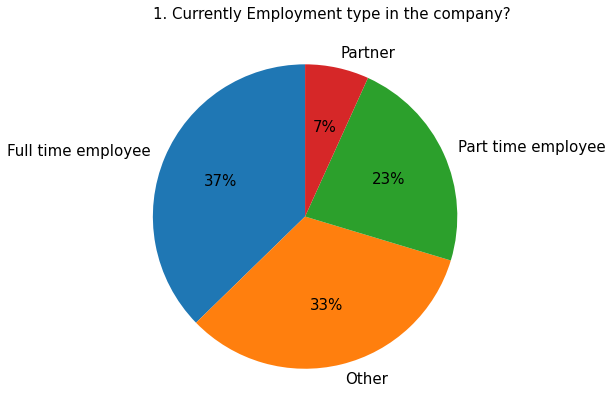

In [90]:
plt.figure(figsize=(7,7))
plt.pie(x['count'], labels=x['1. Currently Employment type in the company?'],startangle=90,  autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.3, s='1. Currently Employment type in the company?', fontsize=15)
plt.show()


In [12]:
x1=df.groupby("2. How does your organization deal with security issues?").size().reset_index(name="count")
x1.sort_values(['2. How does your organization deal with security issues?', 'count'], ascending=False).groupby('count').head()
x1=x1.nlargest(10,'count')
a1=x1['count']
b1=a1/118*100
x1['count%']=b1
x1=round(x1)
print(x1)

  2. How does your organization deal with security issues?  count  count%
4            The company has dedicated security team           33    28.0
1                                      I do not know           29    25.0
0                                   A part of IT job           21    18.0
2                                              Other           15    13.0
5  The company has one-two staffs that handle sec...           14    12.0
3                      Outsourced to the third party            6     5.0


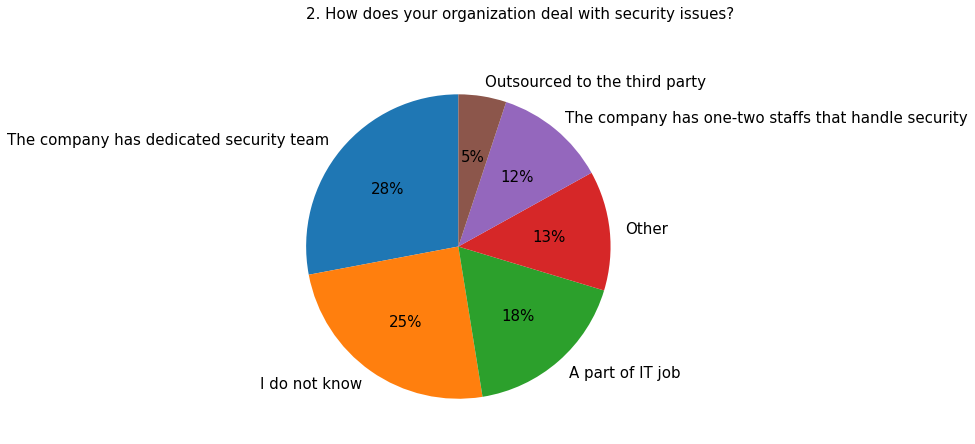

In [35]:
plt.figure(figsize=(7,7))
plt.pie(x1['count'], labels=x1['2. How does your organization deal with security issues?'], startangle=90, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.5, s='2. How does your organization deal with security issues?', fontsize=15)
plt.show()

  3. How much of your company bussiness activity are related to security-related tasks?  \
1                                    Medium. 20-30%.                                      
0                                Low. Less than 20%.                                      
2                       Top priority. More than 30%.                                      

   count  count%  
1     49    42.0  
0     35    30.0  
2     34    29.0  


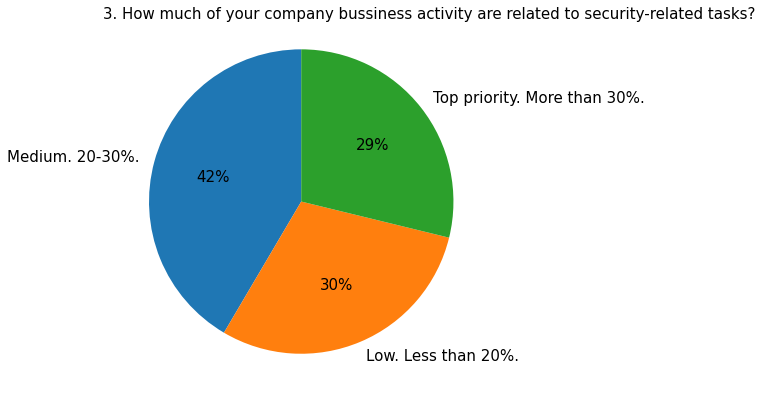

In [41]:
x2=df.groupby("3. How much of your company bussiness activity are related to security-related tasks?").size().reset_index(name="count")
x2.sort_values(['3. How much of your company bussiness activity are related to security-related tasks?', 'count'], ascending=False).groupby('count').head()
x2=x2.nlargest(10,'count')
a2=x2['count']
b2=a2/118*100
x2['count%']=b2
x2=round(x2)
print(x2)

plt.figure(figsize=(7,7))
plt.pie(x2['count'], labels=x2['3. How much of your company bussiness activity are related to security-related tasks?'], startangle=90, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.3, y=1.2, s='3. How much of your company bussiness activity are related to security-related tasks?', fontsize=15)
plt.show()

  4. How often do cybersecurity related problems occur in your organization?  \
2                                     I do not know.                           
4                          Never register incidents.                           
0                               1-5 times per month.                           
1                              5-10 times per month.                           
3                      More than 10 times per month.                           

   count  count%  
2     46    39.0  
4     35    30.0  
0     21    18.0  
1      9     8.0  
3      7     6.0  


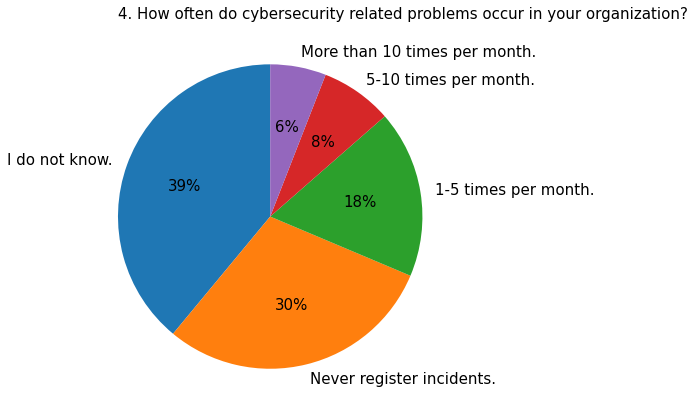

In [45]:
x3=df.groupby("4. How often do cybersecurity related problems occur in your organization?").size().reset_index(name="count")
x3.sort_values(['4. How often do cybersecurity related problems occur in your organization?', 'count'], ascending=False).groupby('count').head()
x3=x3.nlargest(10,'count')
a3=x3['count']
b3=a3/118*100
x3['count%']=b3
x3=round(x3)
print(x3)

plt.figure(figsize=(7,7))
plt.pie(x3['count'], labels=x3['4. How often do cybersecurity related problems occur in your organization?'], startangle=90, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.3, s='4. How often do cybersecurity related problems occur in your organization?', fontsize=15)
plt.show()

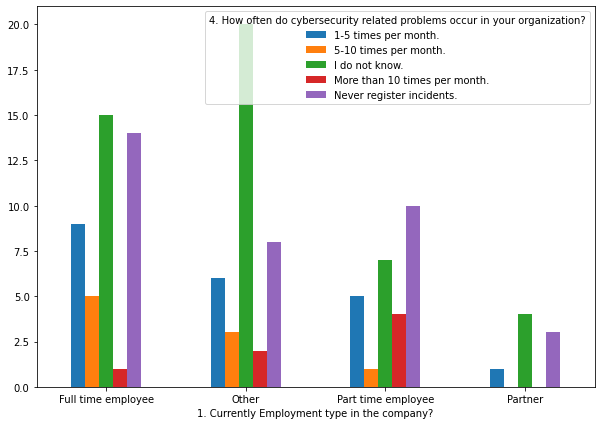

In [46]:
my1 = df['1. Currently Employment type in the company?']
my2 = df['4. How often do cybersecurity related problems occur in your organization?']
myCrosstable = pd.crosstab(my1, my2)
myCrosstable
myCrosstable.plot.bar(figsize=(10,7), rot=0)

   5. What kind of internet platforms and applications does your organization utilize? (Multiple responses are possible).  \
43                                         Others....                                                                       
0              Email for organisations and companies.                                                                       
5   Email for organisations and companies., Online...                                                                       
46                             Social media accounts.                                                                       
41                 Online order, booking and payment.                                                                       
42                                             Others                                                                       
33  Email for organisations and companies., Websit...                                                                       


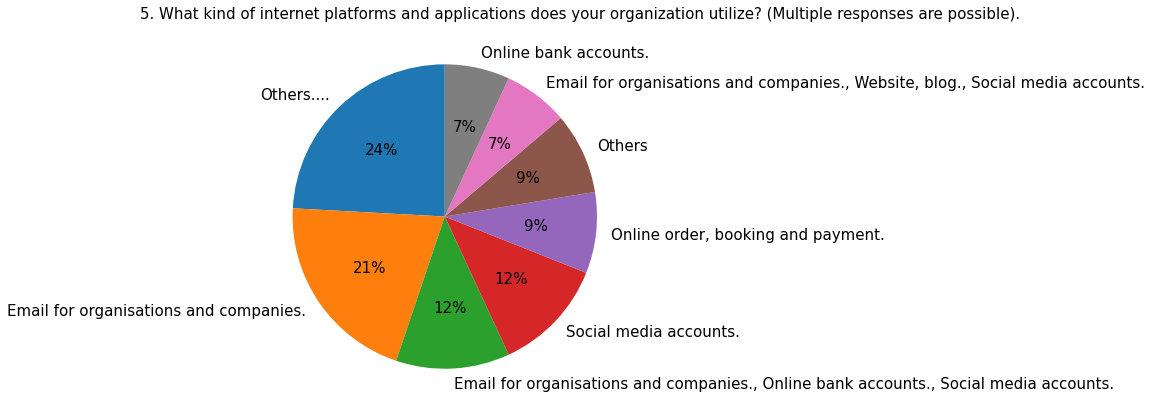

In [49]:
x4=df.groupby("5. What kind of internet platforms and applications does your organization utilize? (Multiple responses are possible).").size().reset_index(name="count")
x4.sort_values(['5. What kind of internet platforms and applications does your organization utilize? (Multiple responses are possible).', 'count'], ascending=False).groupby('count').head()
x4=x4.nlargest(8,'count')
a4=x4['count']
b4=a4/118*100
x4['count%']=b4
x4=round(x4)
print(x4)

plt.figure(figsize=(7,7))
plt.pie(x4['count'], labels=x4['5. What kind of internet platforms and applications does your organization utilize? (Multiple responses are possible).'], startangle=90, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-2, y=1.3, s='5. What kind of internet platforms and applications does your organization utilize? (Multiple responses are possible).', fontsize=15)
plt.show()

  6. The organization should provide trainings on cybersecurity.  count  \
3                                     Strongly agree                 51   
0                                              Agree                 43   
2                                            Neutral                 15   
1                                           Disagree                  6   
4                                  Strongly disagree                  3   

   count%  
3    43.0  
0    36.0  
2    13.0  
1     5.0  
4     3.0  


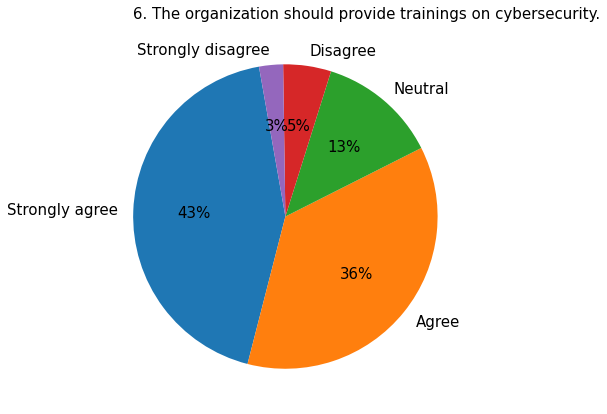

In [51]:
x5=df.groupby("6. The organization should provide trainings on cybersecurity.").size().reset_index(name="count")
x5.sort_values(['6. The organization should provide trainings on cybersecurity.', 'count'], ascending=False).groupby('count').head()
x5=x5.nlargest(8,'count')
a5=x5['count']
b5=a5/118*100
x5['count%']=b5
x5=round(x5)
print(x5)

plt.figure(figsize=(7,7))
plt.pie(x5['count'], labels=x5['6. The organization should provide trainings on cybersecurity.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.3, s='6. The organization should provide trainings on cybersecurity.', fontsize=15)
plt.show()

  7. The organization must inline and adopt security rules and regulations.  \
3                                     Strongly agree                          
0                                              Agree                          
2                                            Neutral                          
1                                           Disagree                          

   count  count%  
3     53    45.0  
0     49    42.0  
2     12    10.0  
1      4     3.0  


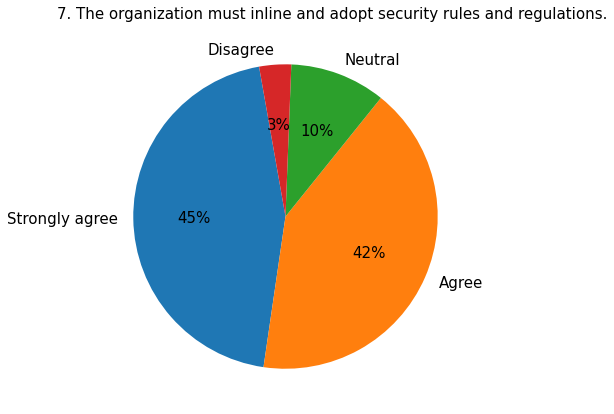

In [53]:
x6=df.groupby("7. The organization must inline and adopt security rules and regulations.").size().reset_index(name="count")
x6.sort_values(['7. The organization must inline and adopt security rules and regulations.', 'count'], ascending=False).groupby('count').head()
x6=x6.nlargest(8,'count')
a6=x6['count']
b6=a6/118*100
x6['count%']=b6
x6=round(x6)
print(x6)

plt.figure(figsize=(7,7))
plt.pie(x6['count'], labels=x6['7. The organization must inline and adopt security rules and regulations.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.5, y=1.3, s='7. The organization must inline and adopt security rules and regulations.', fontsize=15)
plt.show()  

  8. The organization offers security publications, briefings, and gatherings.  \
0                                              Agree                             
3                                     Strongly agree                             
2                                            Neutral                             
1                                           Disagree                             
4                                  Strongly disagree                             

   count  count%  
0     46    39.0  
3     38    32.0  
2     26    22.0  
1      6     5.0  
4      2     2.0  


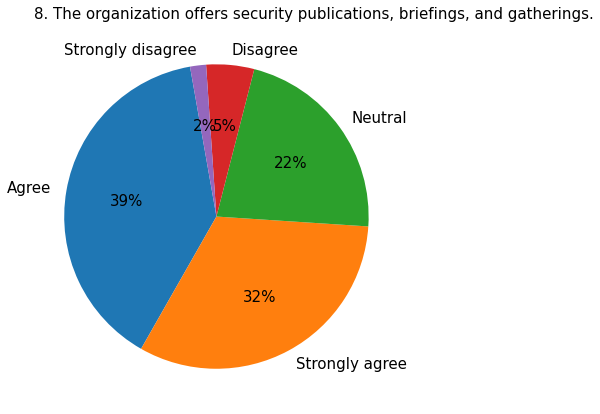

In [57]:
x7=df.groupby("8. The organization offers security publications, briefings, and gatherings.").size().reset_index(name="count")
x7.sort_values(['8. The organization offers security publications, briefings, and gatherings.', 'count'], ascending=False).groupby('count').head()
x7=x7.nlargest(8,'count')
a7=x7['count']
b7=a7/118*100
x7['count%']=b7
x7=round(x7)
print(x7)

plt.figure(figsize=(7,7))
plt.pie(x7['count'], labels=x7['8. The organization offers security publications, briefings, and gatherings.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.2, y=1.3, s='8. The organization offers security publications, briefings, and gatherings.', fontsize=15)
plt.show() 

  9. Normally, share passwords with others.  count  count%
1                                  Disagree     48    41.0
4                         Strongly disagree     39    33.0
2                                   Neutral     16    14.0
0                                     Agree     11     9.0
3                            Strongly agree      4     3.0


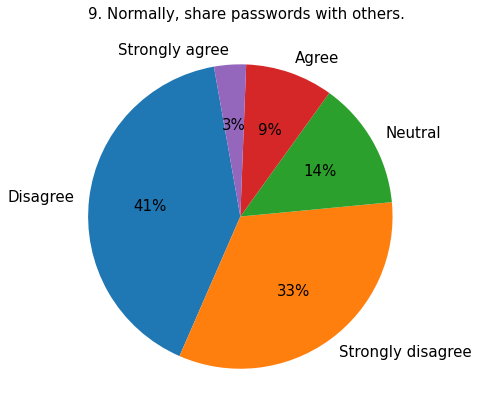

In [58]:
x8=df.groupby("9. Normally, share passwords with others.").size().reset_index(name="count")
x8.sort_values(['9. Normally, share passwords with others.', 'count'], ascending=False).groupby('count').head()
x8=x8.nlargest(8,'count')
a8=x8['count']
b8=a8/118*100
x8['count%']=b8
x8=round(x8)
print(x8)

plt.figure(figsize=(7,7))
plt.pie(x8['count'], labels=x8['9. Normally, share passwords with others.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.3, s='9. Normally, share passwords with others.', fontsize=15)
plt.show()

  10. Open carelessly every email attachment without any attention.  count  \
1                                           Disagree                    50   
4                                  Strongly disagree                    34   
2                                            Neutral                    17   
0                                              Agree                    15   
3                                     Strongly agree                     2   

   count%  
1    42.0  
4    29.0  
2    14.0  
0    13.0  
3     2.0  


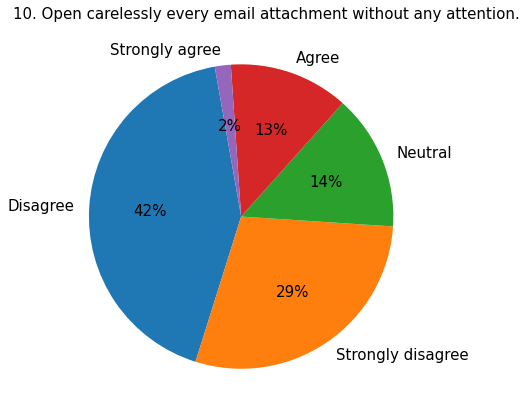

In [61]:
x9=df.groupby("10. Open carelessly every email attachment without any attention.").size().reset_index(name="count")
x9.sort_values(['10. Open carelessly every email attachment without any attention.', 'count'], ascending=False).groupby('count').head()
x9=x9.nlargest(8,'count')
a9=x9['count']
b9=a9/118*100
x9['count%']=b9
x9=round(x9)
print(x9)

plt.figure(figsize=(7,7))
plt.pie(x9['count'], labels=x9['10. Open carelessly every email attachment without any attention.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.5, y=1.3, s='10. Open carelessly every email attachment without any attention.', fontsize=15)
plt.show()

  11. Concentrate to open emails whether its real or junk email or a trap.  \
0                                              Agree                         
1                                           Disagree                         
2                                            Neutral                         
3                                     Strongly agree                         
4                                  Strongly disagree                         

   count  count%  
0     31    26.0  
1     30    25.0  
2     26    22.0  
3     18    15.0  
4     13    11.0  


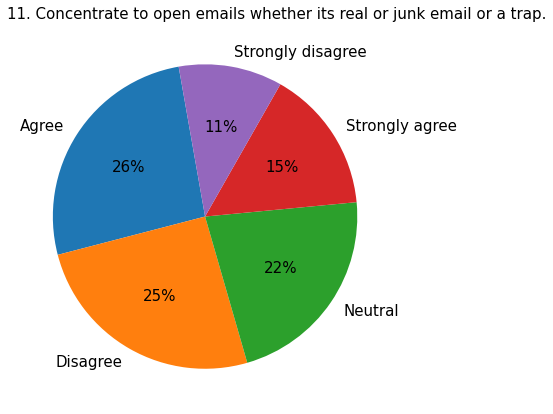

In [63]:
x10=df.groupby("11. Concentrate to open emails whether its real or junk email or a trap.").size().reset_index(name="count")
x10.sort_values(['11. Concentrate to open emails whether its real or junk email or a trap.', 'count'], ascending=False).groupby('count').head()
x10=x10.nlargest(8,'count')
a10=x10['count']
b10=a10/118*100
x10['count%']=b10
x10=round(x10)
print(x10)

plt.figure(figsize=(7,7))
plt.pie(x10['count'], labels=x10['11. Concentrate to open emails whether its real or junk email or a trap.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.3, y=1.3, s='11. Concentrate to open emails whether its real or junk email or a trap.', fontsize=15)
plt.show()

  12. Connecting a personal USB to a computer at the workplace is allowed?  \
2                                            Neutral                         
0                                              Agree                         
1                                           Disagree                         
4                                  Strongly disagree                         
3                                     Strongly agree                         

   count  count%  
2     32    27.0  
0     31    26.0  
1     31    26.0  
4     13    11.0  
3     11     9.0  


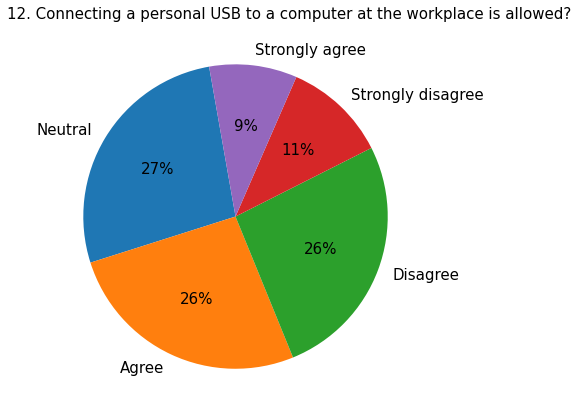

In [65]:
x11=df.groupby("12. Connecting a personal USB to a computer at the workplace is allowed?").size().reset_index(name="count")
x11.sort_values(['12. Connecting a personal USB to a computer at the workplace is allowed?', 'count'], ascending=False).groupby('count').head()
x11=x11.nlargest(8,'count')
a11=x11['count']
b11=a11/118*100
x11['count%']=b11
x11=round(x11)
print(x11)

plt.figure(figsize=(7,7))
plt.pie(x11['count'], labels=x11['12. Connecting a personal USB to a computer at the workplace is allowed?'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.5, y=1.3, s='12. Connecting a personal USB to a computer at the workplace is allowed?', fontsize=15)
plt.show()

  13. Systems and software must be updated to maintain security.  count  \
3                                     Strongly agree                 52   
0                                              Agree                 48   
2                                            Neutral                 10   
1                                           Disagree                  5   
4                                  Strongly disagree                  3   

   count%  
3    44.0  
0    41.0  
2     8.0  
1     4.0  
4     3.0  


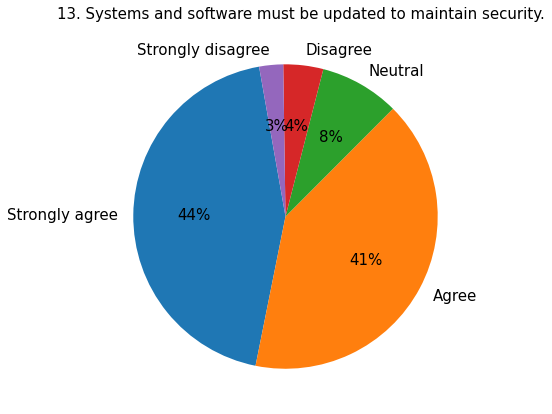

In [66]:
x12=df.groupby("13. Systems and software must be updated to maintain security.").size().reset_index(name="count")
x12.sort_values(['13. Systems and software must be updated to maintain security.', 'count'], ascending=False).groupby('count').head()
x12=x12.nlargest(8,'count')
a12=x12['count']
b12=a12/118*100
x12['count%']=b12
x12=round(x12)
print(x12)

plt.figure(figsize=(7,7))
plt.pie(x12['count'], labels=x12['13. Systems and software must be updated to maintain security.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.5, y=1.3, s='13. Systems and software must be updated to maintain security.', fontsize=15)
plt.show()

  14. Backups are required to preserve security.  count  count%
0                                          Agree     53    45.0
3                                 Strongly agree     42    36.0
2                                        Neutral     14    12.0
1                                       Disagree      6     5.0
4                              Strongly disagree      3     3.0


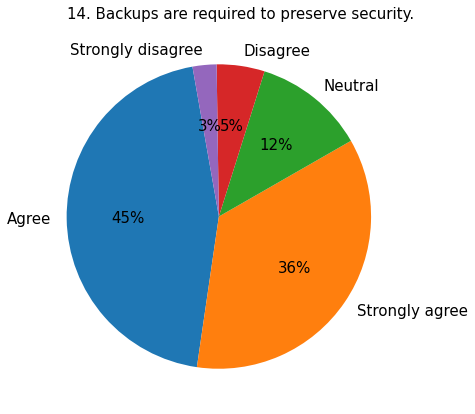

In [67]:
x13=df.groupby("14. Backups are required to preserve security.").size().reset_index(name="count")
x13.sort_values(['14. Backups are required to preserve security.', 'count'], ascending=False).groupby('count').head()
x13=x13.nlargest(8,'count')
a13=x13['count']
b13=a13/118*100
x13['count%']=b13
x13=round(x13)
print(x13)

plt.figure(figsize=(7,7))
plt.pie(x13['count'], labels=x13['14. Backups are required to preserve security.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.3, s='14. Backups are required to preserve security.', fontsize=15)
plt.show()

  15. Is it allowed to open the website which needs to be more authentic?  \
0                                              Agree                        
2                                            Neutral                        
3                                     Strongly agree                        
1                                           Disagree                        
4                                  Strongly disagree                        

   count  count%  
0     47    40.0  
2     40    34.0  
3     19    16.0  
1      9     8.0  
4      3     3.0  


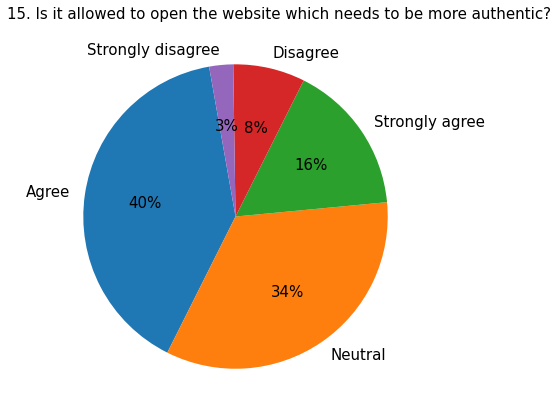

In [69]:
x14=df.groupby("15. Is it allowed to open the website which needs to be more authentic?").size().reset_index(name="count")
x14.sort_values(['15. Is it allowed to open the website which needs to be more authentic?', 'count'], ascending=False).groupby('count').head()
x14=x14.nlargest(8,'count')
a14=x14['count']
b14=a14/118*100
x14['count%']=b14
x14=round(x14)
print(x14)

plt.figure(figsize=(7,7))
plt.pie(x14['count'], labels=x14['15. Is it allowed to open the website which needs to be more authentic?'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.5, y=1.3, s='15. Is it allowed to open the website which needs to be more authentic?', fontsize=15)
plt.show()

  16. Password updated regularly?  count  count%
0                           Agree     37    31.0
3                  Strongly agree     29    25.0
2                         Neutral     27    23.0
1                        Disagree     21    18.0
4               Strongly disagree      4     3.0


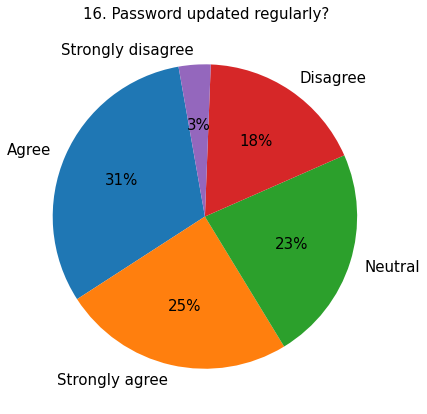

In [72]:
x15=df.groupby("16. Password updated regularly?").size().reset_index(name="count")
x15.sort_values(['16. Password updated regularly?', 'count'], ascending=False).groupby('count').head()
x15=x15.nlargest(8,'count')
a15=x15['count']
b15=a15/118*100
x15['count%']=b15
x15=round(x15)
print(x15)

plt.figure(figsize=(7,7))
plt.pie(x15['count'], labels=x15['16. Password updated regularly?'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-.8, y=1.3, s='16. Password updated regularly?', fontsize=15)
plt.show()

  17. Using the same password for various websites and social networks is a normal practice.  \
0                                              Agree                                           
2                                            Neutral                                           
1                                           Disagree                                           
3                                     Strongly agree                                           
4                                  Strongly disagree                                           

   count  count%  
0     38    32.0  
2     28    24.0  
1     26    22.0  
3     13    11.0  
4     13    11.0  


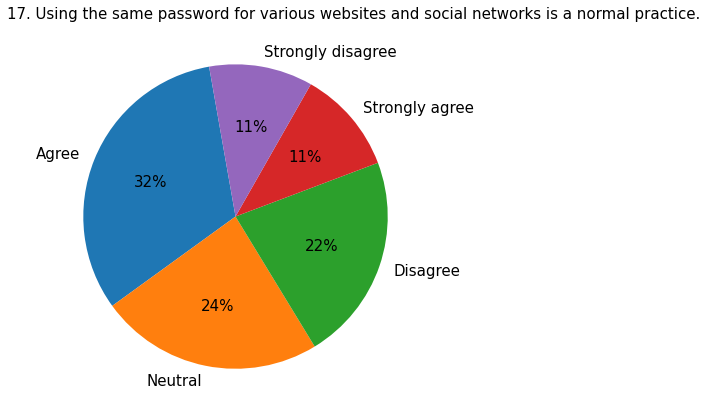

In [77]:
x16=df.groupby("17. Using the same password for various websites and social networks is a normal practice.").size().reset_index(name="count")
x16.sort_values(['17. Using the same password for various websites and social networks is a normal practice.', 'count'], ascending=False).groupby('count').head()
x16=x16.nlargest(8,'count')
a16=x16['count']
b16=a16/118*100
x16['count%']=b16
x16=round(x16)
print(x16)

plt.figure(figsize=(7,7))
plt.pie(x16['count'], labels=x16['17. Using the same password for various websites and social networks is a normal practice.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.5, y=1.3, s='17. Using the same password for various websites and social networks is a normal practice.', fontsize=15)
plt.show()

  18. Using personal devices (mobile, tablet, and laptop) is allowed during work.  \
0                                              Agree                                
1                                           Disagree                                
2                                            Neutral                                
3                                     Strongly agree                                
4                                  Strongly disagree                                

   count  count%  
0     41    35.0  
1     28    24.0  
2     25    21.0  
3     13    11.0  
4     11     9.0  


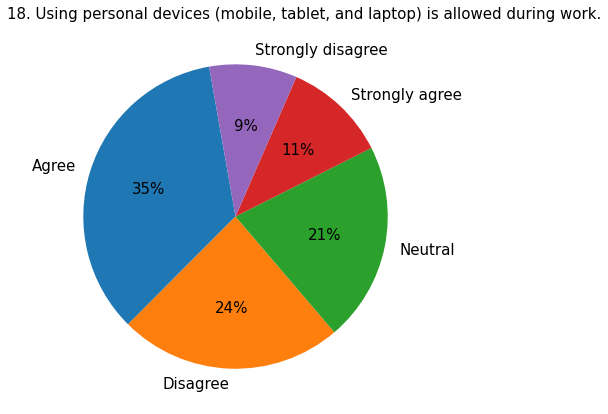

In [79]:
x17=df.groupby("18. Using personal devices (mobile, tablet, and laptop) is allowed during work.").size().reset_index(name="count")
x17.sort_values(['18. Using personal devices (mobile, tablet, and laptop) is allowed during work.', 'count'], ascending=False).groupby('count').head()
x17=x17.nlargest(8,'count')
a17=x17['count']
b17=a17/118*100
x17['count%']=b17
x17=round(x17)
print(x17)

plt.figure(figsize=(7,7))
plt.pie(x17['count'], labels=x17['18. Using personal devices (mobile, tablet, and laptop) is allowed during work.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1.5, y=1.3, s='18. Using personal devices (mobile, tablet, and laptop) is allowed during work.', fontsize=15)
plt.show()

  19. Virus, malware, and Trojan horses may propagate from email attachments.  \
0                                              Agree                            
2                                            Neutral                            
1                                           Disagree                            
3                                     Strongly agree                            
4                                  Strongly disagree                            

   count  count%  
0     43    36.0  
2     30    25.0  
1     20    17.0  
3     20    17.0  
4      5     4.0  


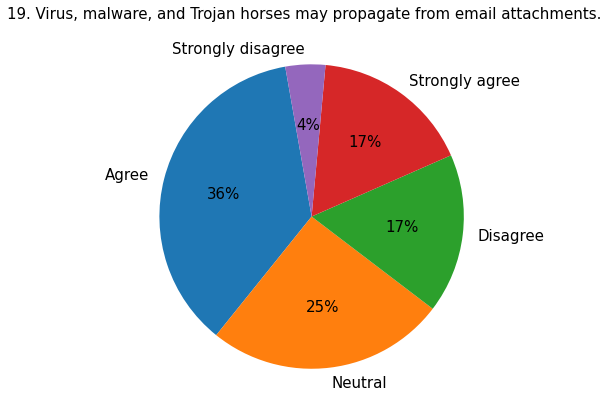

In [83]:
x18=df.groupby("19. Virus, malware, and Trojan horses may propagate from email attachments.").size().reset_index(name="count")
x18.sort_values(['19. Virus, malware, and Trojan horses may propagate from email attachments.', 'count'], ascending=False).groupby('count').head()
x18=x18.nlargest(8,'count')
a18=x18['count']
b18=a18/118*100
x18['count%']=b18
x18=round(x18)
print(x18)

plt.figure(figsize=(7,7))
plt.pie(x18['count'], labels=x18['19. Virus, malware, and Trojan horses may propagate from email attachments.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-2, y=1.3, s='19. Virus, malware, and Trojan horses may propagate from email attachments.', fontsize=15)
plt.show()

  20. When a user clicks on an unsecured link on a website, viruses, malware, and Trojan horses may propagate.  \
0                                              Agree                                                             
2                                            Neutral                                                             
3                                     Strongly agree                                                             
1                                           Disagree                                                             
4                                  Strongly disagree                                                             

   count  count%  
0     49    42.0  
2     26    22.0  
3     23    19.0  
1     16    14.0  
4      4     3.0  


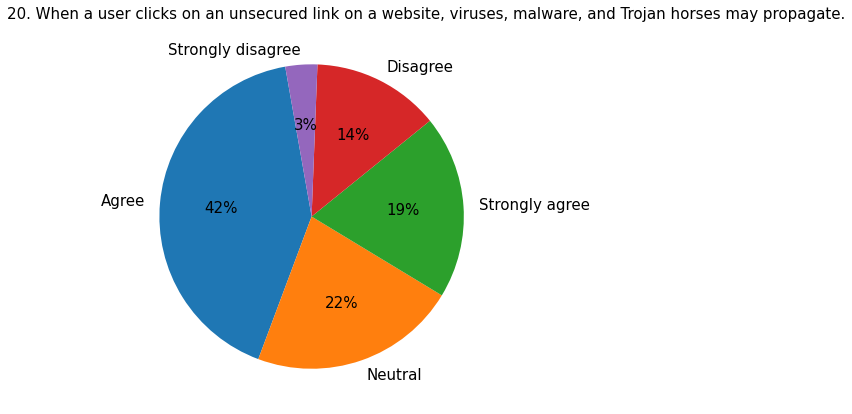

In [85]:
x19=df.groupby("20. When a user clicks on an unsecured link on a website, viruses, malware, and Trojan horses may propagate.").size().reset_index(name="count")
x19.sort_values(['20. When a user clicks on an unsecured link on a website, viruses, malware, and Trojan horses may propagate.', 'count'], ascending=False).groupby('count').head()
x19=x19.nlargest(8,'count')
a19=x19['count']
b19=a19/118*100
x19['count%']=b19
x19=round(x19)
print(x19)

plt.figure(figsize=(7,7))
plt.pie(x19['count'], labels=x19['20. When a user clicks on an unsecured link on a website, viruses, malware, and Trojan horses may propagate.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-2, y=1.3, s='20. When a user clicks on an unsecured link on a website, viruses, malware, and Trojan horses may propagate.', fontsize=15)
plt.show()

  21. I am aware of phishing and how to prevent it.  count  count%
0                                             Agree     48    41.0
2                                           Neutral     43    36.0
1                                          Disagree     14    12.0
3                                    Strongly agree     12    10.0
4                                 Strongly disagree      1     1.0


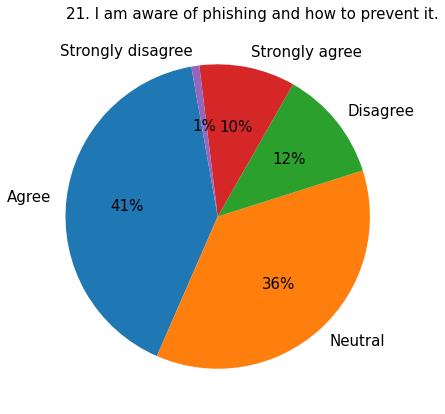

In [86]:
x20=df.groupby("21. I am aware of phishing and how to prevent it.").size().reset_index(name="count")
x20.sort_values(['21. I am aware of phishing and how to prevent it.', 'count'], ascending=False).groupby('count').head()
x20=x20.nlargest(8,'count')
a20=x20['count']
b20=a20/118*100
x20['count%']=b20
x20=round(x20)
print(x20)

plt.figure(figsize=(7,7))
plt.pie(x20['count'], labels=x20['21. I am aware of phishing and how to prevent it.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.3, s='21. I am aware of phishing and how to prevent it.', fontsize=15)
plt.show()

  22. I am familiar with email fraud and how to prevent it.  count  count%
0                                              Agree            51    43.0
2                                            Neutral            38    32.0
3                                     Strongly agree            14    12.0
1                                           Disagree            13    11.0
4                                  Strongly disagree             2     2.0


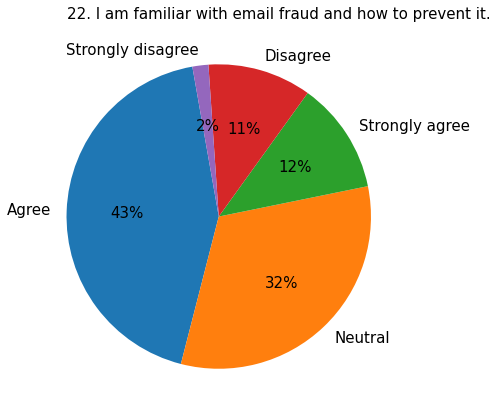

In [87]:
x21=df.groupby("22. I am familiar with email fraud and how to prevent it.").size().reset_index(name="count")
x21.sort_values(['22. I am familiar with email fraud and how to prevent it.', 'count'], ascending=False).groupby('count').head()
x21=x21.nlargest(8,'count')
a21=x21['count']
b21=a21/118*100
x21['count%']=b21
x21=round(x21)
print(x21)

plt.figure(figsize=(7,7))
plt.pie(x21['count'], labels=x21['22. I am familiar with email fraud and how to prevent it.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.3, s='22. I am familiar with email fraud and how to prevent it.', fontsize=15)
plt.show()

  23. I am familiar with ransomware and how to prevent it.  count  count%
2                                            Neutral           48    41.0
0                                              Agree           35    30.0
1                                           Disagree           21    18.0
3                                     Strongly agree           14    12.0


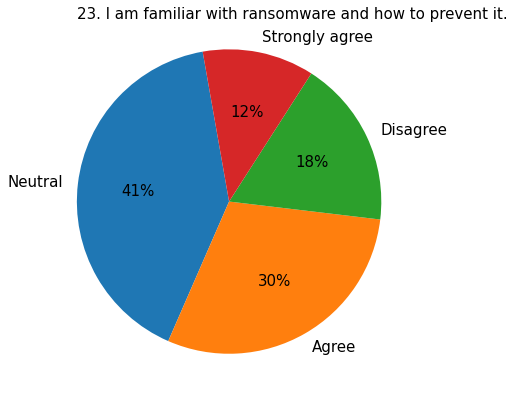

In [89]:
x22=df.groupby("23. I am familiar with ransomware and how to prevent it.").size().reset_index(name="count")
x22.sort_values(['23. I am familiar with ransomware and how to prevent it.', 'count'], ascending=False).groupby('count').head()
x22=x22.nlargest(8,'count')
a22=x22['count']
b22=a22/118*100
x22['count%']=b22
x22=round(x22)
print(x22)

plt.figure(figsize=(7,7))
plt.pie(x22['count'], labels=x22['23. I am familiar with ransomware and how to prevent it.'], startangle=100, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.text(x=-1, y=1.25, s='23. I am familiar with ransomware and how to prevent it.', fontsize=15)
plt.show()